In [1]:
import numpy as np
import pdkit

In [2]:
filename = "sensor_data.json"

gait_timeseries = pdkit.GaitTimeSeries().load_data(filename, format_file="mpower")

Sampling rate is 100.0 Hz


In [3]:
gait_timeseries

,td,x,y,z,mag_sum_acc
timestamp,,,,,
1970-01-01 00:00:00.000000000,0.000000,-0.02,-0.02,-0.03,0.041231
1970-01-01 00:00:00.009253978,0.009254,-0.02,0.01,0.00,0.022361
1970-01-01 00:00:00.021387100,0.021387,0.05,0.02,0.01,0.054772
1970-01-01 00:00:00.029980182,0.029980,0.10,0.01,-0.02,0.102470
1970-01-01 00:00:00.039829015,0.039829,0.18,-0.05,-0.06,0.196214
...,...,...,...,...,...
1970-01-01 00:00:09.949930191,9.949930,0.25,-0.13,-0.16,0.324037
1970-01-01 00:00:09.959990024,9.959990,0.27,-0.14,-0.22,0.375366
1970-01-01 00:00:09.969990015,9.969990,0.29,-0.14,-0.30,0.440114


In [4]:
gait_processor = pdkit.GaitProcessor(duration=gait_timeseries.td[-1])
gait_features = gait_processor.gait(gait_timeseries.mag_sum_acc)

In [5]:
cadence = gait_features[1] * 10

cadence

8.007862945259513

In [6]:
freeze_time, freeze_index, locomotor_freeze_index = gait_processor.freeze_of_gait(gait_timeseries)

Sampling rate is 100.0 Hz


In [7]:
rts = gait_processor.resample_signal(gait_timeseries)

Sampling rate is 100.0 Hz


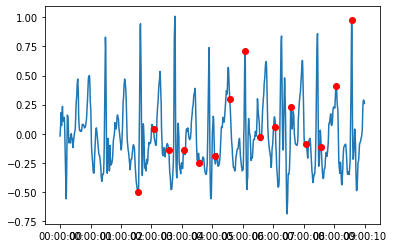

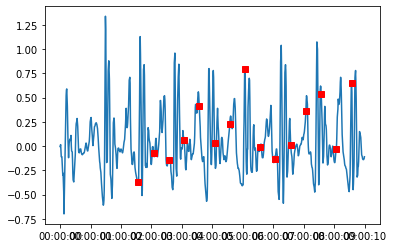

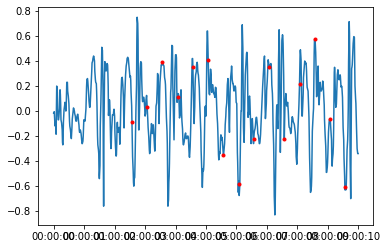

In [8]:
import matplotlib.pyplot as plt

FOG_positives = 0
gait_total_samples = 0

for c, col in zip(['ro', 'rs', 'r.'], ['x', 'y', 'z']):
    plt.plot(rts[col])
    plt.plot(rts[col][freeze_time], c)

    FOG_positives += len(rts[col][freeze_time])
    gait_total_samples += len(rts[col])

    plt.show()

In [9]:
percent_FOG_positives = FOG_positives / gait_total_samples

In [10]:
percent_FOG_positives

0.015

In [11]:
len(freeze_time) / len(rts)


0.015

In [14]:
peaks = []
for window in freeze_index:
	peaks.append(max(window))

peaks = np.array(peaks)



In [15]:
np.mean(peaks) + np.std(peaks)

9.385251

In [16]:
count = 0
for window in freeze_index:
	if max(window) > (np.mean(peaks) + np.std(peaks)):
		count += 1
		
count / len(freeze_index) > 0.5

False